<a href="https://colab.research.google.com/github/Rohit2209Raj/EDA_and_Preprocessing/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# EDA


In [4]:
df.shape

(918, 12)

In [5]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
913,False
914,False
915,False
916,False


In [8]:
df.duplicated().sum()

np.int64(0)

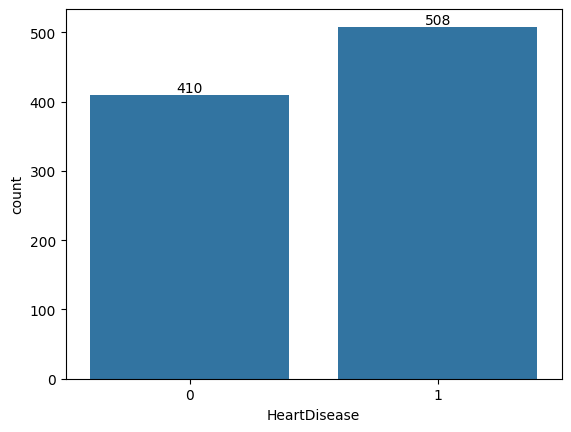

In [9]:
# bar plot of disease
ax=sns.countplot(x=df['HeartDisease'])
for container in ax.containers:
  ax.bar_label(container)

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
# subplotting of different numeric columns:

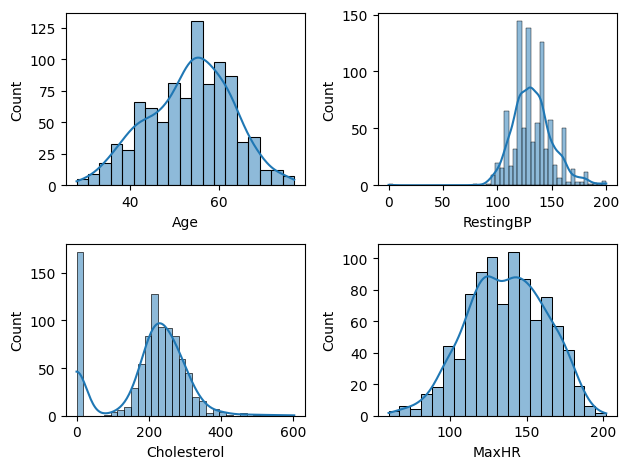

In [12]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()


In [23]:
axis=df['RestingBP'].value_counts().sort_index(ascending=True)
axis
# Here we got an unexpected entry for 0 which is unusual and unrealistic

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


In [24]:
df['Cholesterol'].value_counts().sort_index(ascending=True)
# Here also we see 172 entries with zero colestrol which is unrealistic


,count
Cholesterol,
0,172
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


In [25]:
# we will fill al; these 0 with means

In [28]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()
ch_mean.round(2)

np.float64(244.64)

In [35]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)

In [36]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
244.635389,172
254.000000,11
220.000000,10
223.000000,10
204.000000,9
...,...
353.000000,1
278.000000,1
157.000000,1


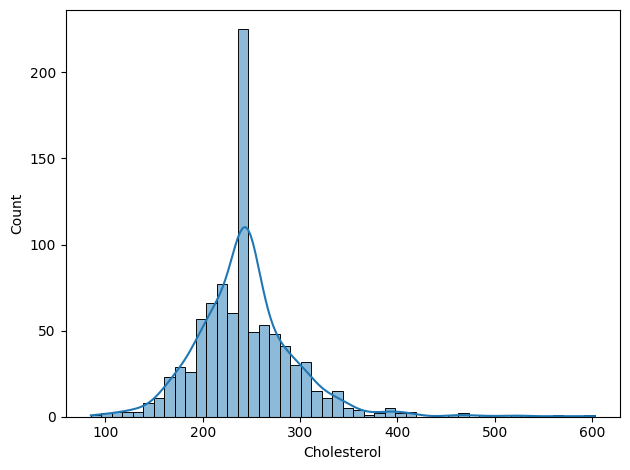

In [37]:
def plotting(var,num):
  # plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)

# plotting('Age',1)
# plotting('RestingBP',2)
plotting('Cholesterol',3)
# plotting('MaxHR',4)

plt.tight_layout()

In [39]:
rest_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()

In [40]:
df['RestingBP']=df['RestingBP'].replace(0,rest_mean)

In [41]:
df['RestingBP'].value_counts()

,count
RestingBP,
120.0,132
130.0,118
140.0,107
110.0,58
150.0,55
...,...
101.0,1
117.0,1
192.0,1


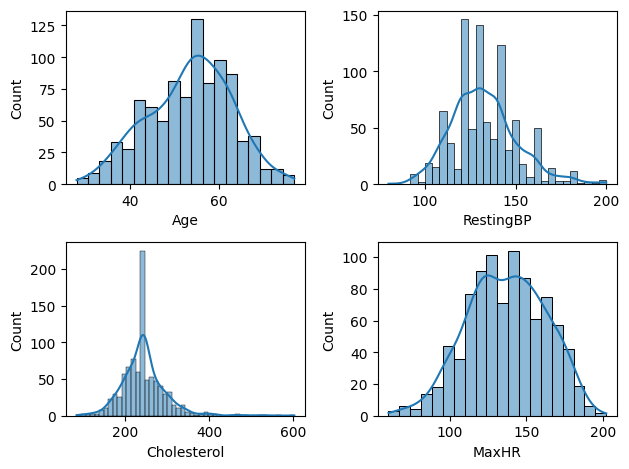

In [42]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [43]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='count'>

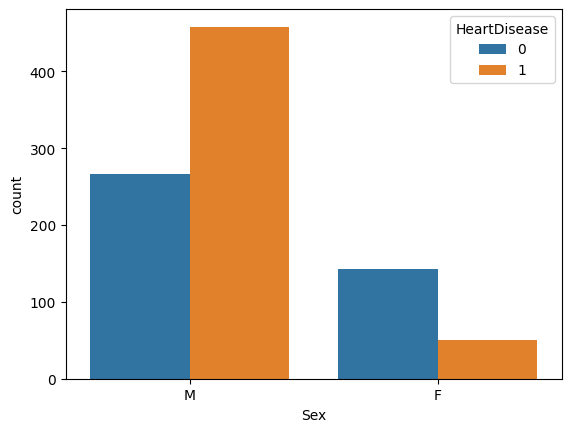

In [45]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

<Axes: xlabel='ChestPainType', ylabel='count'>

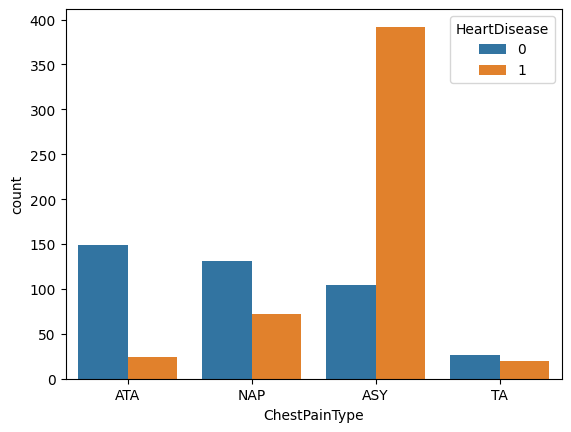

In [46]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])